In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.util import prompt_for_user_token
import os

In [2]:
cid = '732fb417e5a04ad6849fe4338de5859f'
user_name = 'jayzzhang'
shared_secret = '3b23e61779474fe384aba5cd7053217'
ruri = 'http://localhost:8001/callback'
scopes = 'user-library-read'

In [3]:
print('Enter an updated authorization token: ')
token = input()

Enter an updated authorization token: 
BQDYVfwKszdlJQj3f8ducuMzyrCY0my7Tnq7J3kdAomquLizEgjPIFNc82eRpscLk2hjkdu0pggevbsWMOMYFAOBcSFNvj3VfZXMw529Gj85dQ5wX2QZ-vPUYCVGwb0yGoUsJeEvUrmstH75vpayGDxU6IBOSG1PpN25OXRodb6y6pdolej0BVU9e3M4FZHQ9YJkzQ


In [4]:
sp = spotipy.Spotify(auth = token)

In [5]:
##gets all saved tracks + time saved

results1 = sp.current_user_saved_tracks(limit=1,offset=0)
total = results1['total']

saved_tracks=[]
saved_time = []
offset1 = 0

while offset1 < total:
    lim = min(50,total-offset1)
    results = sp.current_user_saved_tracks(limit=lim,offset=offset1)
    for i in range(lim):
        saved_tracks.append(results['items'][i]['track']['id'])
        saved_time.append(results['items'][i]['added_at'])
    offset1 = offset1+lim

In [6]:
albums = []
artists = []
artist_ids = []
duration = []
explicit = []
popularity = []
track_name = []
track_ids = []
album_type = []
album_ids = []
artists_list = []
track_offset = 0

while track_offset < total:
    lim = min(50, total-track_offset)
    r1 = sp.tracks(saved_tracks[i:i+lim])
    for j in range(lim):
        albums.append(r1['tracks'][j]['album']['name'])
        album_ids.append(r1['tracks'][j]['album']['id'])
        artists.append(r1['tracks'][j]['album']['artists'][0]['name'])
        duration.append(r1['tracks'][j]['duration_ms'])
        explicit.append(r1['tracks'][j]['explicit'])
        popularity.append(r1['tracks'][j]['popularity'])
        track_ids.append(r1['tracks'][j]['id'])
        track_name.append(r1['tracks'][j]['name'])
        album_type.append(r1['tracks'][j]['album']['album_type'])
        artist_ids.append(r1['tracks'][j]['album']['artists'][0]['id'])
        artists_list.append(r1['tracks'][j]['album']['artists'])
    track_offset = track_offset+ lim

In [7]:
artist_list = list(set(artist_ids))
path = 'data/'
os.chdir(path) 

In [8]:
audio_features = []
feature_offset = 0

while feature_offset < total:
    lim = min(100,total-feature_offset)
    r3 = sp.audio_features(track_ids[feature_offset:feature_offset+lim])
    for j in range(len(r3)):
        audio_features.append(r3[j])
    feature_offset = lim + feature_offset

In [9]:
artist_names = []

for j in range(len(artists_list)):
    artist_sublist = []

    for k in range(len(artists_list[j])):
        artist_sublist.append(artists_list[j][k]['name'])
    artist_names.append(artist_sublist)

len(artist_names)

650

In [10]:
#saved artist data
following = (artist_list)
saved_artist_name = []
genres = []
artist_popularity = []
artist_followers = []
artist_offset = 0

while artist_offset < total:
    lim = min(50,total-artist_offset)
    r4 = sp.artists(artist_ids[artist_offset:artist_offset+lim])
    
    for j in range(lim):
        genres.append(r4['artists'][j]['genres'])
    artist_offset += lim

In [11]:
artists_list[-4:-3][0]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2txTOM1PXeT6aMDnEtSbn1'},
  'href': 'https://api.spotify.com/v1/artists/2txTOM1PXeT6aMDnEtSbn1',
  'id': '2txTOM1PXeT6aMDnEtSbn1',
  'name': 'Juto',
  'type': 'artist',
  'uri': 'spotify:artist:2txTOM1PXeT6aMDnEtSbn1'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3ApUX1o6oSz321MMECyIYd'},
  'href': 'https://api.spotify.com/v1/artists/3ApUX1o6oSz321MMECyIYd',
  'id': '3ApUX1o6oSz321MMECyIYd',
  'name': 'Quinn XCII',
  'type': 'artist',
  'uri': 'spotify:artist:3ApUX1o6oSz321MMECyIYd'}]

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

features = pd.DataFrame(audio_features)
tracks = pd.DataFrame({
    'artist id':artist_ids
    ,'date saved':saved_time
    ,'album name':albums
    ,'artist name':artists
    ,'is explicit':explicit
    ,'track name':track_name
    ,'popularity':popularity
    ,'artists':artist_names
    , 'genres':genres})

In [13]:
df = pd.concat([tracks,features],axis=1)

In [14]:
df.head()

,artist id,date saved,album name,artist name,is explicit,track name,popularity,artists,genres,danceability,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,3Y7RZ31TRPVadSFVy1o8os,2020-05-20T05:14:57Z,Hard Place,H.E.R.,False,Hard Place,68,[H.E.R.],"[pop, r&b]",0.614,...,0.1630,0.340,160.075,audio_features,4IablJ6SqVNGY4vrseyKxu,spotify:track:4IablJ6SqVNGY4vrseyKxu,https://api.spotify.com/v1/tracks/4IablJ6SqVNG...,https://api.spotify.com/v1/audio-analysis/4Iab...,271733,4
1,21mKp7DqtSNHhCAU2ugvUw,2020-05-19T18:09:51Z,Say My Name Remixes,ODESZA,False,Say My Name (feat. Zyra) - RAC Mix,45,[ODESZA],"[chillwave, ninja]",0.647,...,0.0616,0.477,115.002,audio_features,2IDHoSlbG0CKH9rhq68wTb,spotify:track:2IDHoSlbG0CKH9rhq68wTb,https://api.spotify.com/v1/tracks/2IDHoSlbG0CK...,https://api.spotify.com/v1/audio-analysis/2IDH...,243091,4
2,1l9d7B8W0IHy3LqWsxP2SH,2020-05-19T18:03:08Z,Three,Phantogram,False,Answer,56,[Phantogram],"[alternative dance, chillwave, dream pop, elec...",0.362,...,0.1210,0.107,148.376,audio_features,09eSdS5RTgyodJt3krr5AC,spotify:track:09eSdS5RTgyodJt3krr5AC,https://api.spotify.com/v1/tracks/09eSdS5RTgyo...,https://api.spotify.com/v1/audio-analysis/09eS...,231600,5
3,1l9d7B8W0IHy3LqWsxP2SH,2020-05-19T17:49:24Z,Ceremony,Phantogram,False,Pedestal,55,[Phantogram],"[alternative dance, chillwave, dream pop, elec...",0.510,...,0.0903,0.245,139.822,audio_features,2sE8dFhRTmNKPn398XcrmX,spotify:track:2sE8dFhRTmNKPn398XcrmX,https://api.spotify.com/v1/tracks/2sE8dFhRTmNK...,https://api.spotify.com/v1/audio-analysis/2sE8...,191053,4
4,2x7EATekOPhFGRx3syMGEC,2020-05-18T23:48:48Z,Lucky Me (feat. Great Good Fine Ok),The Knocks,False,Lucky Me (feat. Great Good Fine Ok),56,"[The Knocks, Great Good Fine Ok]","[alternative dance, edm, indie pop, indie popt...",0.716,...,0.1570,0.358,119.915,audio_features,5BNBNU5w5f5IIw0Q1Z9Acq,spotify:track:5BNBNU5w5f5IIw0Q1Z9Acq,https://api.spotify.com/v1/tracks/5BNBNU5w5f5I...,https://api.spotify.com/v1/audio-analysis/5BNB...,202125,4


In [24]:
artist_df = pd.DataFrame(df.artists.values.tolist()).add_prefix('artist_')

artist_df.head()

AttributeError: 'DataFrame' object has no attribute 'artists'

In [16]:
genre_df=pd.DataFrame(df.genres.values.tolist()).add_prefix('genre_')
genre_df.head()

(650, 13)

In [17]:
df=df.drop(['artist name','artists','genres'],axis=1)
df=pd.concat([df,artist_df,genre_df],axis=1)
df.head()

,artist id,date saved,album name,is explicit,track name,popularity,danceability,energy,key,loudness,...,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,genre_11,genre_12
0,3Y7RZ31TRPVadSFVy1o8os,2020-05-20T05:14:57Z,Hard Place,False,Hard Place,68,0.614,0.719,9,-4.694,...,None,None,None,None,None,None,None,None,None,None
1,21mKp7DqtSNHhCAU2ugvUw,2020-05-19T18:09:51Z,Say My Name Remixes,False,Say My Name (feat. Zyra) - RAC Mix,45,0.647,0.624,9,-8.446,...,None,None,None,None,None,None,None,None,None,None
2,1l9d7B8W0IHy3LqWsxP2SH,2020-05-19T18:03:08Z,Three,False,Answer,56,0.362,0.371,11,-8.383,...,electropop,indie pop,indie rock,indietronica,metropopolis,modern rock,shimmer pop,vapor soul,None,None
3,1l9d7B8W0IHy3LqWsxP2SH,2020-05-19T17:49:24Z,Ceremony,False,Pedestal,55,0.510,0.861,11,-5.151,...,electropop,indie pop,indie rock,indietronica,metropopolis,modern rock,shimmer pop,vapor soul,None,None
4,2x7EATekOPhFGRx3syMGEC,2020-05-18T23:48:48Z,Lucky Me (feat. Great Good Fine Ok),False,Lucky Me (feat. Great Good Fine Ok),56,0.716,0.861,10,-4.407,...,indie poptimism,indietronica,new french touch,nu disco,pop,tropical house,vapor soul,None,None,None


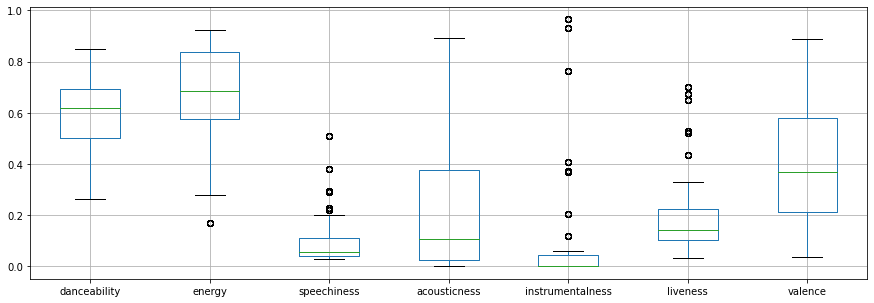

In [18]:
df_drop=df.drop(['analysis_url','uri','track_href','type','id','artist id'],axis=1)
fig = plt.figure(figsize=(15,5)) 
df_drop.boxplot(column = ['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'])

In [23]:
nas=pd.DataFrame(df_drop.isnull().sum().sort_values(ascending=False)/len(df_drop),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
genre_12,0.98
artist_2,0.98
genre_11,0.98
genre_10,0.92
genre_9,0.88
genre_8,0.86
genre_7,0.82
genre_6,0.82
artist_1,0.72
genre_5,0.66


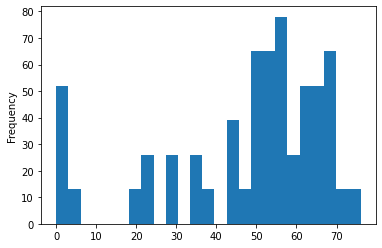

In [104]:
_=df_drop['popularity'].plot(kind='hist',bins = 25)

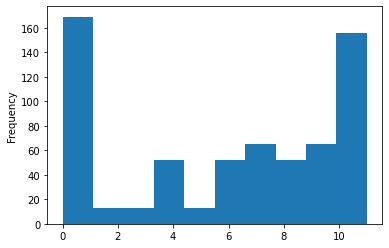

In [105]:
_=df_drop['key'].plot(kind='hist',bins = 10)

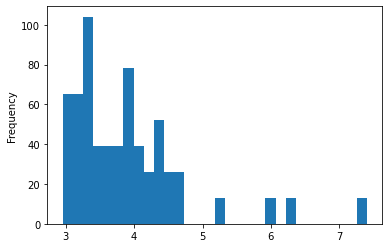

In [106]:
df_drop['duration_min'] = df_drop['duration_ms']/60000.0
_=df_drop['duration_min'].plot(kind='hist',bins = 30)

In [ ]:
df_drop.to_csv('working_data.csv',index=False)